<a href="https://colab.research.google.com/github/Adity-star/DS/blob/main/EDA%20on%20insurance%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform EDA on below insurance dataset

Link: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

Perform All steps of EDA and document conclusions and then perform feature engineering.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/archive (2).zip')

In [ ]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [ ]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [ ]:
df.isnull().sum()

,0
index,0
PatientID,0
age,5
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,3


In [ ]:
df.duplicated().sum()


0

In [ ]:
df['age'].fillna(df['age'].mean())

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())
df['region'] = df['region'].fillna(df['region'].mode()[0])

In [ ]:
df.isnull().sum()

,0
index,0
PatientID,0
age,0
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,0


In [ ]:
del df['index'and'PatientID']

In [ ]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,38.078652,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...
1335,44.000000,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,59.000000,female,38.1,120,No,1,Yes,northeast,58571.07
1337,30.000000,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,37.000000,male,30.4,106,No,0,Yes,southeast,62592.87


In [ ]:
df.columns

Index(['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim'],
      dtype='object')

Underweight = <18.5. Normal weight = 18.5–24.9. Overweight = 25–29.9

In [ ]:
def bmi_category(n):
  if n < 18.5:
    return 'Underweight'
  elif 18.5 <= n < 25:
    return 'Normal weight'
  elif 25 <= n < 30:
    return 'Overweight'
  else:
    return 'Obesity'

In [ ]:
df['bmi_category'] = df['bmi'].apply(bmi_category)

In [ ]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_category
0,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87,Normal weight
1,24.000000,male,30.1,87,No,0,No,southeast,1131.51,Obesity
2,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94,Obesity
3,38.078652,male,33.7,80,No,0,No,northwest,1136.40,Obesity
4,38.078652,male,34.1,100,No,0,No,northwest,1137.01,Obesity
...,...,...,...,...,...,...,...,...,...,...
1335,44.000000,female,35.5,88,Yes,0,Yes,northwest,55135.40,Obesity
1336,59.000000,female,38.1,120,No,1,Yes,northeast,58571.07,Obesity
1337,30.000000,male,34.5,91,Yes,3,Yes,northwest,60021.40,Obesity
1338,37.000000,male,30.4,106,No,0,Yes,southeast,62592.87,Obesity


In [ ]:
df['bmi_category'].value_counts()

,count
bmi_category,
Obesity,708
Overweight,389
Normal weight,223
Underweight,20


<Axes: xlabel='bmi_category', ylabel='Count'>

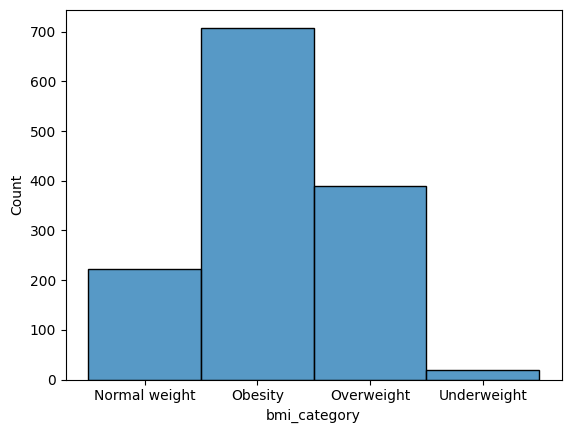

In [ ]:
sns.histplot(df['bmi_category'])

<Axes: ylabel='count'>

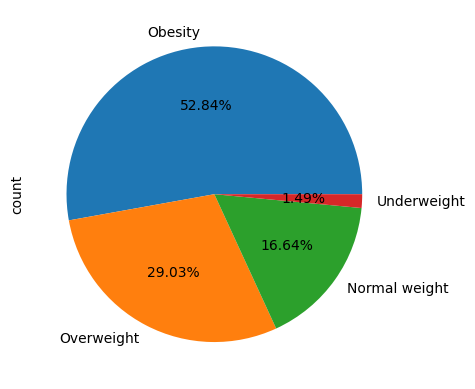

In [ ]:
df['bmi_category'].value_counts().plot(kind='pie',autopct = '%1.2f%%')

<Axes: xlabel='bmi_category', ylabel='claim'>

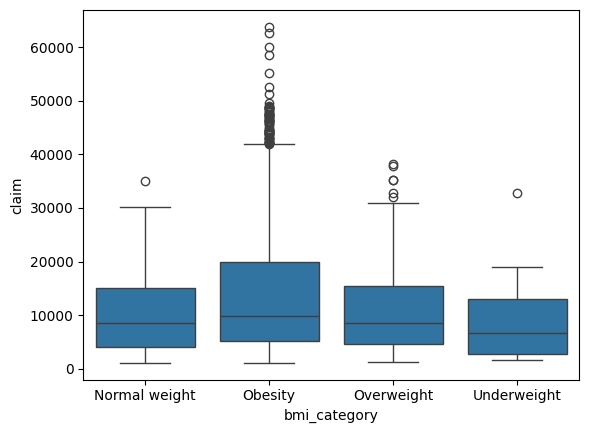

In [ ]:
sns.boxplot(data=df,x='bmi_category',y='claim')

In [ ]:
df.groupby('bmi_category')['claim'].mean().reset_index()

,bmi_category,claim
0,Normal weight,10340.598744
1,Obesity,15531.992599
2,Overweight,11000.079306
3,Underweight,8852.201500


<Axes: xlabel='bmi_category', ylabel='claim'>

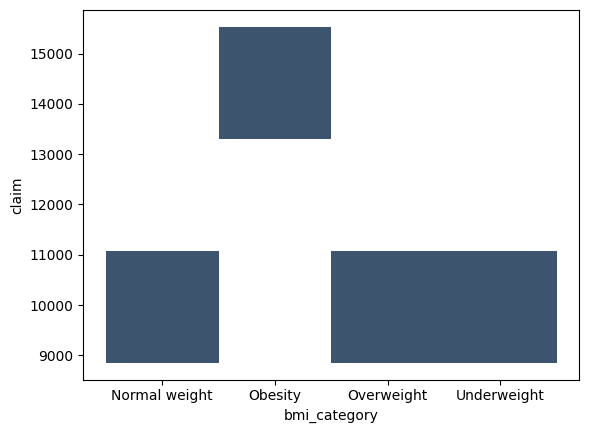

In [ ]:
sns.histplot(data = df.groupby('bmi_category')['claim'].mean().reset_index(), x='bmi_category',y='claim')

In [ ]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_category
0,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87,Normal weight
1,24.000000,male,30.1,87,No,0,No,southeast,1131.51,Obesity
2,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94,Obesity
3,38.078652,male,33.7,80,No,0,No,northwest,1136.40,Obesity
4,38.078652,male,34.1,100,No,0,No,northwest,1137.01,Obesity


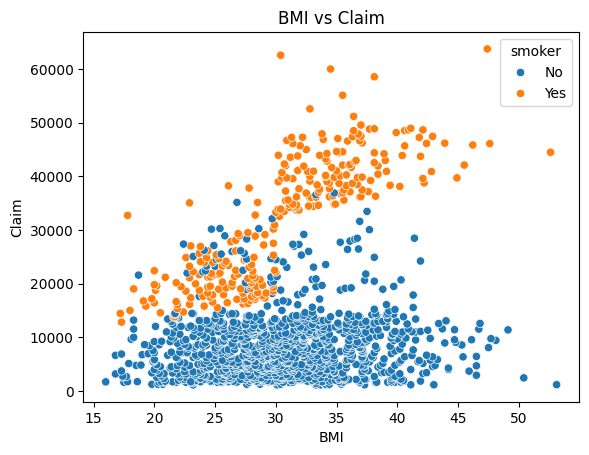

In [ ]:
sns.scatterplot(data=df, x='bmi', y='claim', hue='smoker')
plt.title('BMI vs Claim')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.show()

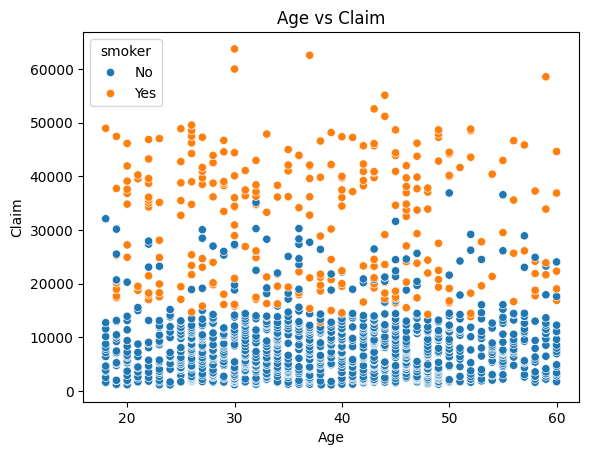

In [ ]:
sns.scatterplot(data = df, x='age' ,y='claim',hue='smoker')
plt.title('Age vs Claim')
plt.xlabel('Age')
plt.ylabel('Claim')
plt.show()

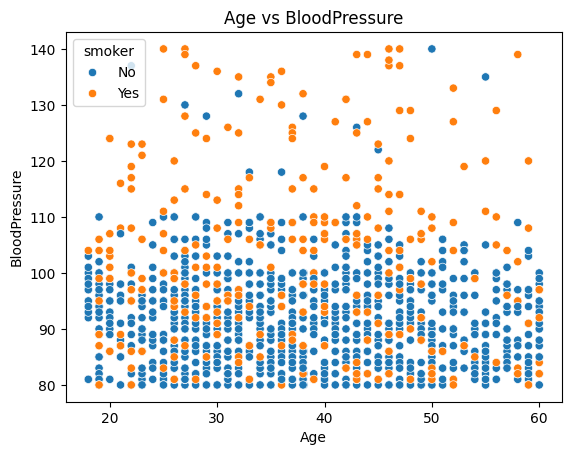

In [ ]:
sns.scatterplot(data=df, x='age', y='bloodpressure', hue='smoker')
plt.title('Age vs BloodPressure')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.show()

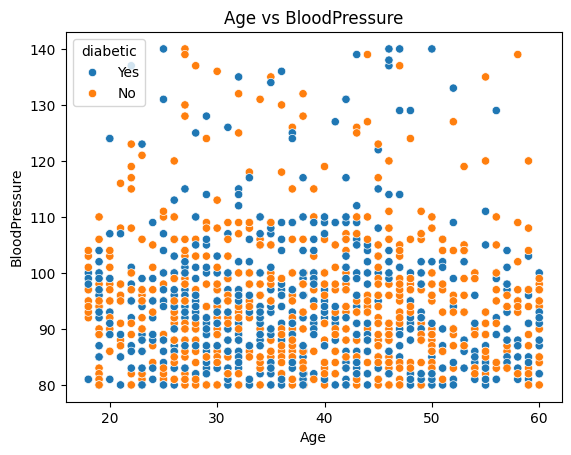

In [ ]:
sns.scatterplot(data=df, x='age', y='bloodpressure', hue='diabetic')
plt.title('Age vs BloodPressure')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.show()

Text(0, 0.5, 'Claim')

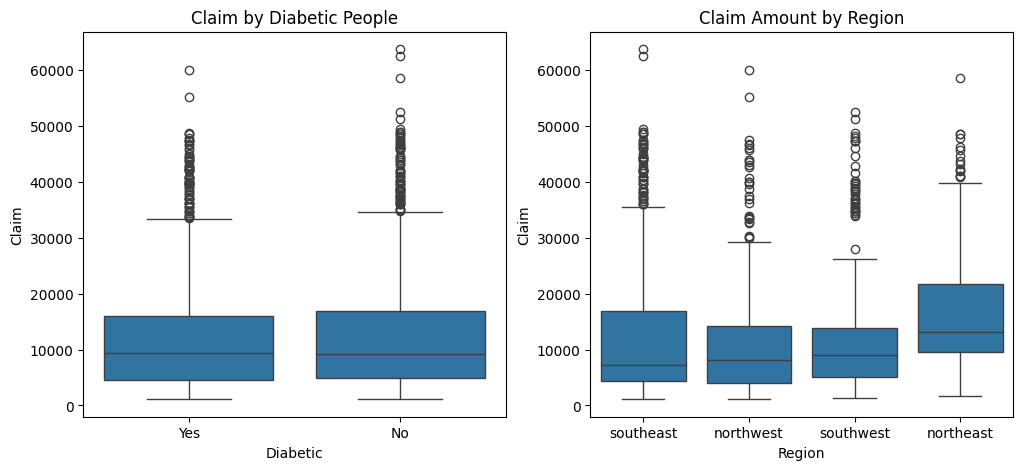

In [ ]:
fig , ax = plt.subplots(1,2,figsize=(12,5))

sns.boxplot(data=df, x='diabetic', y='claim',ax=ax[0])
ax[0].set_title('Claim by Diabetic People')
ax[0].set_xlabel('Diabetic')
ax[0].set_ylabel('Claim')


sns.boxplot(data=df, x='region', y='claim',ax=ax[1])
ax[1].set_title('Claim Amount by Region')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Claim')


In [ ]:
def bloodpressure_rate(n):

    if n < 120:
        return "normal"
    elif 120 <= n < 130:
        return "elevated"
    elif 130 <= n < 140:
        return "hbp-stage1"
    elif 140 <= n < 180:
        return "hbp-stage2"
    elif n >= 180:
        return "hypertensive_crisis"
    else:
        return "Invalid Value"

df['bloodpressure_rate'] = df['bloodpressure'].apply(bloodpressure_rate)

In [ ]:

df['bloodpressure_rate'].value_counts()

,count
bloodpressure_rate,
normal,1281
elevated,30
hbp-stage1,24
hbp-stage2,5


In [ ]:

df.groupby(['bloodpressure_rate','gender'])['claim'].sum().reset_index().sort_values(by='claim',ascending=False)

,bloodpressure_rate,gender,claim
7,normal,male,8178686.44
6,normal,female,7335992.54
1,elevated,male,743722.46
2,hbp-stage1,female,489049.23
0,elevated,female,420597.22
3,hbp-stage1,male,399013.79
5,hbp-stage2,male,116195.24
4,hbp-stage2,female,75422.24


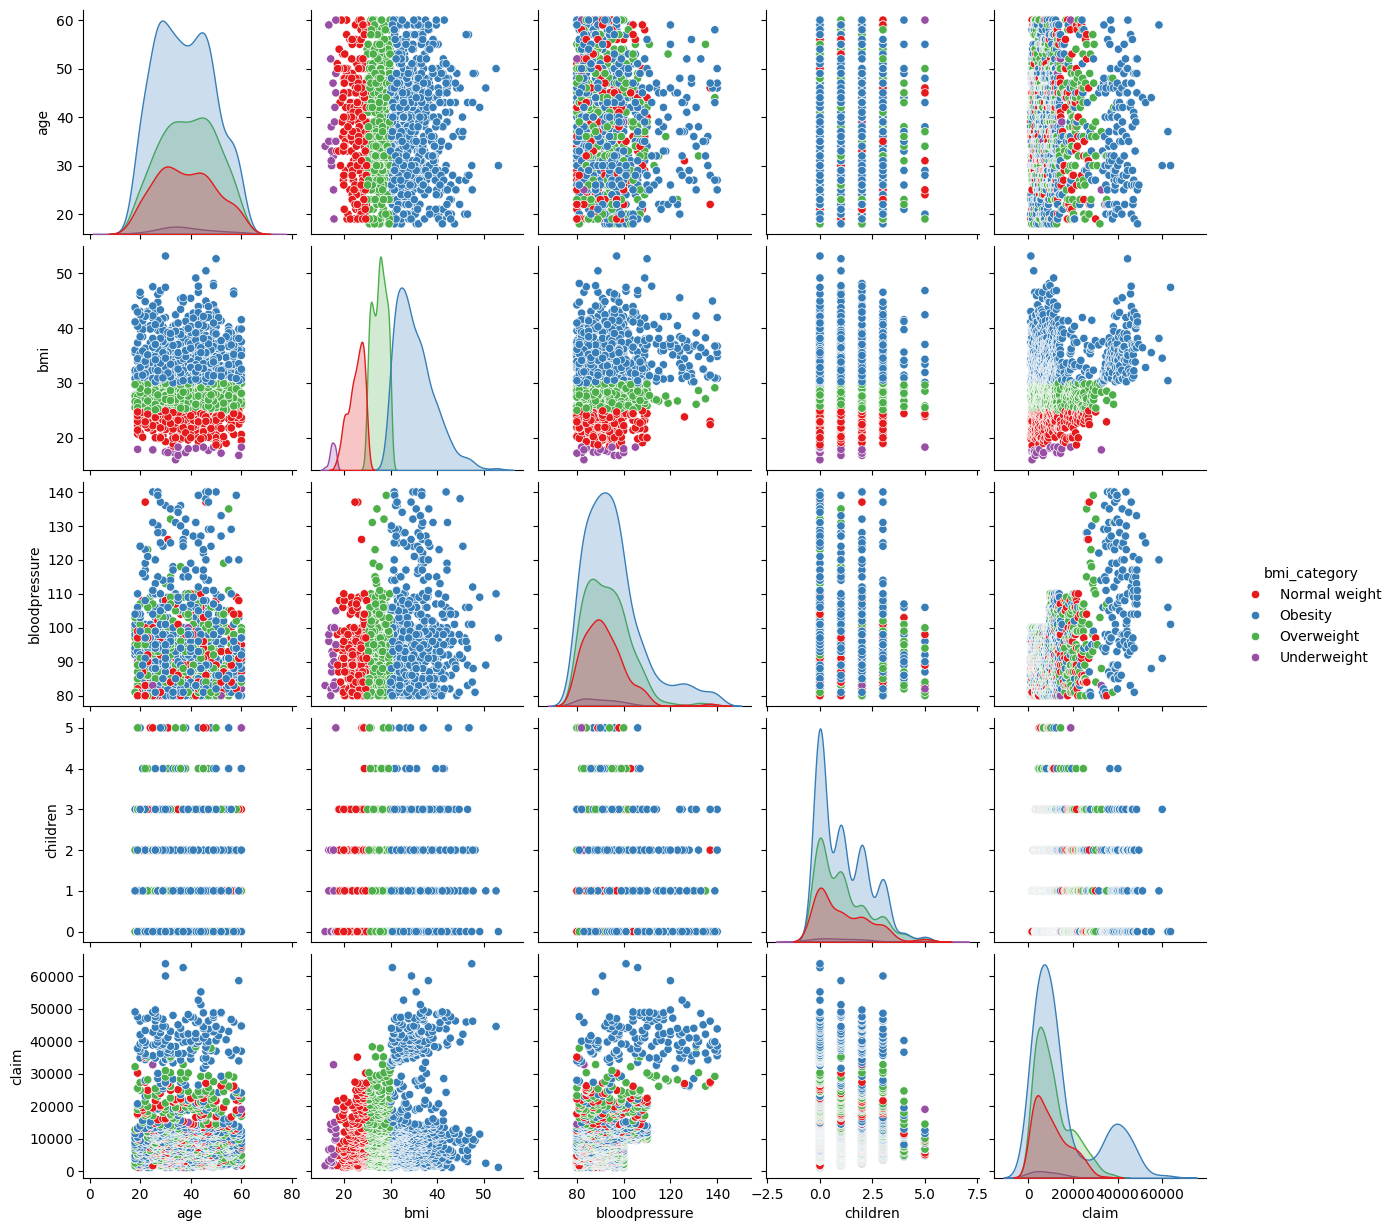

In [ ]:
sns.pairplot(data=df, hue='bmi_category', palette='Set1')


In [ ]:
numerical_fea = df.select_dtypes(include=np.number).columns
df[numerical_fea].corr()


,age,bmi,bloodpressure,children,claim
age,1.000000,-0.041919,-0.060247,-0.025507,-0.027856
bmi,-0.041919,1.000000,0.143544,0.012092,0.197401
bloodpressure,-0.060247,0.143544,1.000000,-0.031682,0.531341
children,-0.025507,0.012092,-0.031682,1.000000,0.069233
claim,-0.027856,0.197401,0.531341,0.069233,1.000000


<Axes: >

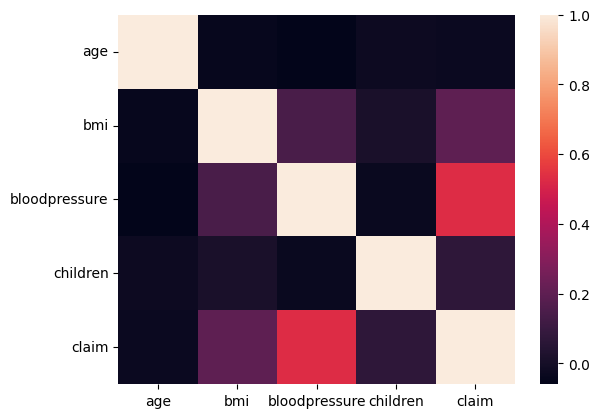

In [ ]:
sns.heatmap(df.corr(numeric_only=True))


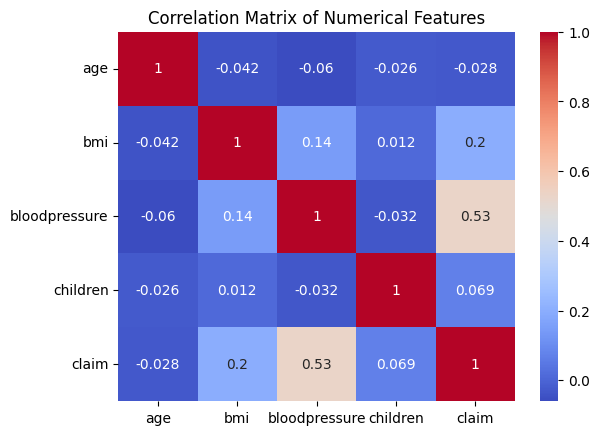

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<Axes: xlabel='claim', ylabel='Count'>

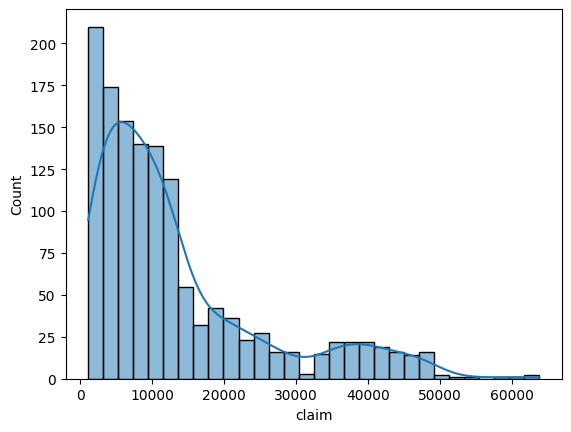

In [ ]:
sns.histplot(df['claim'],kde=True)

In [ ]:
df.groupby('smoker')['claim'].mean().reset_index()


,smoker,claim
0,No,8421.121576
1,Yes,32050.231971
